In [5]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

In [6]:
no1_df = pd.read_csv(f'../datasets/Dataset_NO1.csv')
no1 = no1_df[no1_df[' Region'] == 'us-west-1b'].drop(' Region', axis=1)
no1[' Price '].max()-no1[' Price '].min()

62.4967

In [7]:
bookings = ['exactbooking', 'underbooking', 'overbooking', 'mixedbooking']

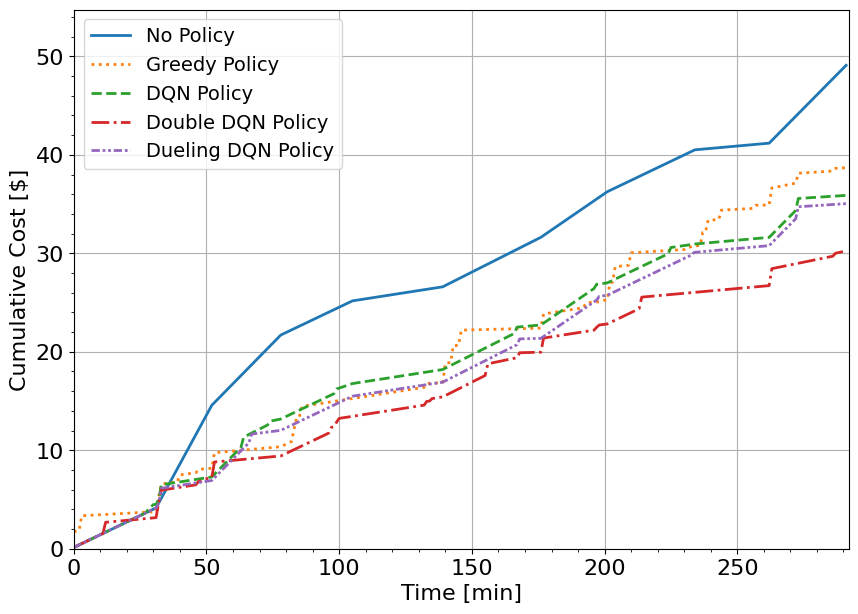

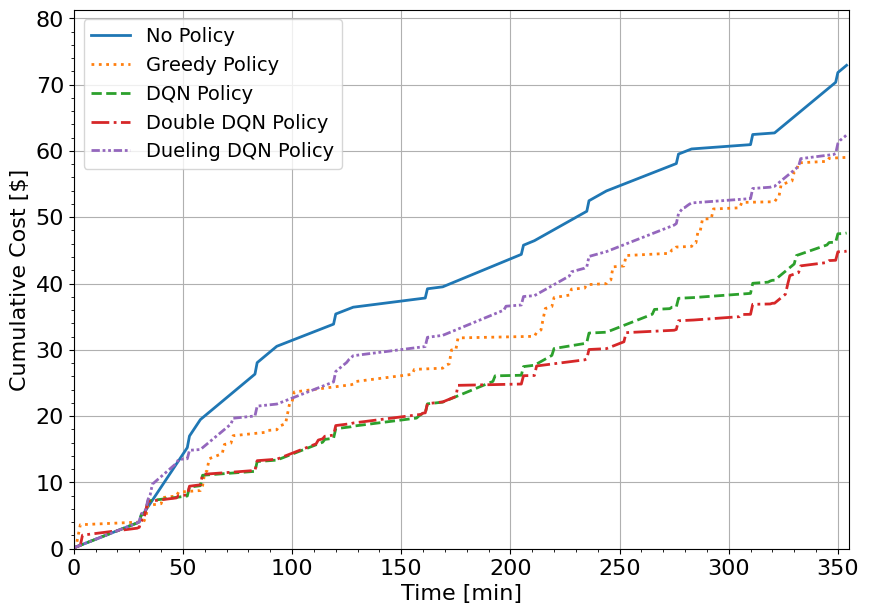

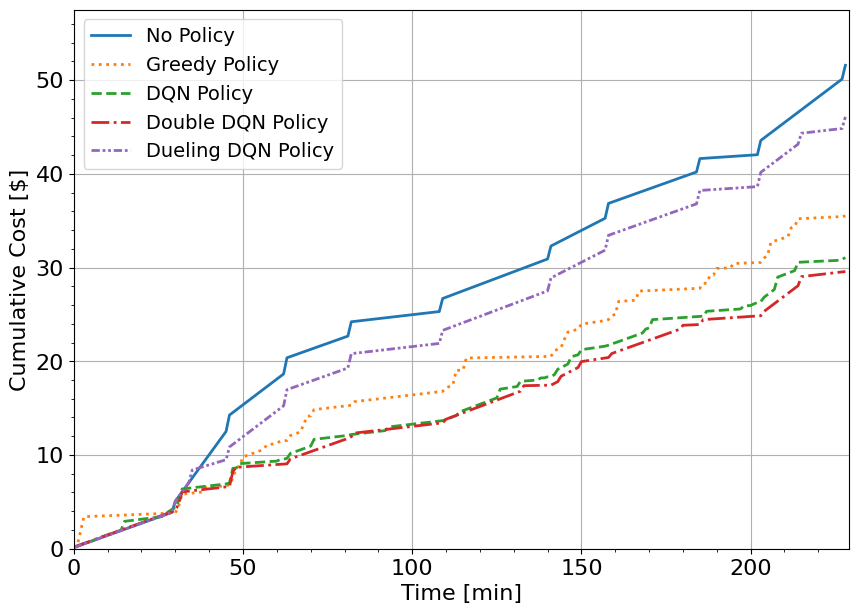

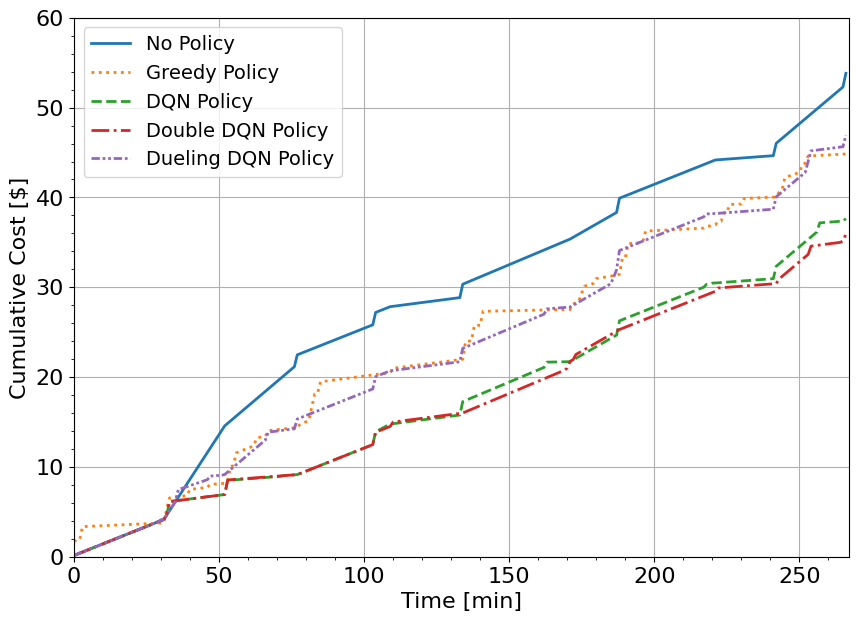

In [9]:
def draw_cumulative_reward_plots(booking):
    # load the data
    no_policy_df = pd.read_csv(f'{booking}/no_policy.csv')
    greedy_policy_df = pd.read_csv(f'{booking}/greedy_policy.csv')
    dqn_policy_df = pd.read_csv(f'{booking}/dqn_policy.csv')
    double_dqn_policy_df = pd.read_csv(f'{booking}/double_dqn_policy.csv')
    dueling_dqn_policy_df = pd.read_csv(f'{booking}/dueling_dqn_policy.csv')

    # get the first episode
    no_policy_ep = no_policy_df.query('episode == 0')
    greedy_policy_ep = greedy_policy_df.query('episode == 0')
    dqn_policy_ep = dqn_policy_df.query('episode == 0')
    double_dqn_policy_ep = double_dqn_policy_df.query('episode == 0')
    dueling_dqn_policy_ep = dueling_dqn_policy_df.query('episode == 0')

    # get the cumulative rewards
    no_policy_ep['cum_reward'] = -no_policy_ep.reward.cumsum()
    greedy_policy_ep['cum_reward'] = -greedy_policy_ep.reward.cumsum()
    dqn_policy_ep['cum_reward'] = -dqn_policy_ep.reward.cumsum()
    double_dqn_policy_ep['cum_reward'] = -double_dqn_policy_ep.reward.cumsum()
    dueling_dqn_policy_ep['cum_reward'] = -dueling_dqn_policy_ep.reward.cumsum()

    # draw the plot fot the cumulative rewards
    plt.figure(figsize=(10, 7))
    plt.plot(no_policy_ep['cum_reward'], label='No Policy', linewidth=2, linestyle='solid')
    plt.plot(greedy_policy_ep['cum_reward'], label='Greedy Policy', linewidth=2, linestyle='dotted')
    plt.plot(dqn_policy_ep['cum_reward'], label='DQN Policy', linewidth=2, linestyle='dashed')
    plt.plot(double_dqn_policy_ep['cum_reward'], label='Double DQN Policy', linewidth=2, linestyle='dashdot')
    plt.plot(dueling_dqn_policy_ep['cum_reward'], label='Dueling DQN Policy', linewidth=2, linestyle=(0, (3, 1, 1, 1, 1, 1)))
    
    # maximum
    max_cost = max(no_policy_ep['cum_reward'].tolist()+
             greedy_policy_ep['cum_reward'].tolist() +
             dqn_policy_ep['cum_reward'].tolist()+
             double_dqn_policy_ep['cum_reward'].tolist()+
             dueling_dqn_policy_ep['cum_reward'].tolist())
    
#     plt.title(f'Costs for {booking}', fontweight="bold", fontsize=18)
    plt.xlabel('Time [min]', fontsize=16)
    plt.ylabel('Cumulative Cost [$]', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim([0, len(no_policy_ep)])
    plt.ylim([0, max_cost*1.115])
    plt.grid(True)
    plt.minorticks_on()
    plt.legend(fontsize=14)
    
for booking in bookings:
    draw_cumulative_reward_plots(booking)

In [8]:
bookings

['exactbooking', 'underbooking', 'overbooking', 'mixedbooking']

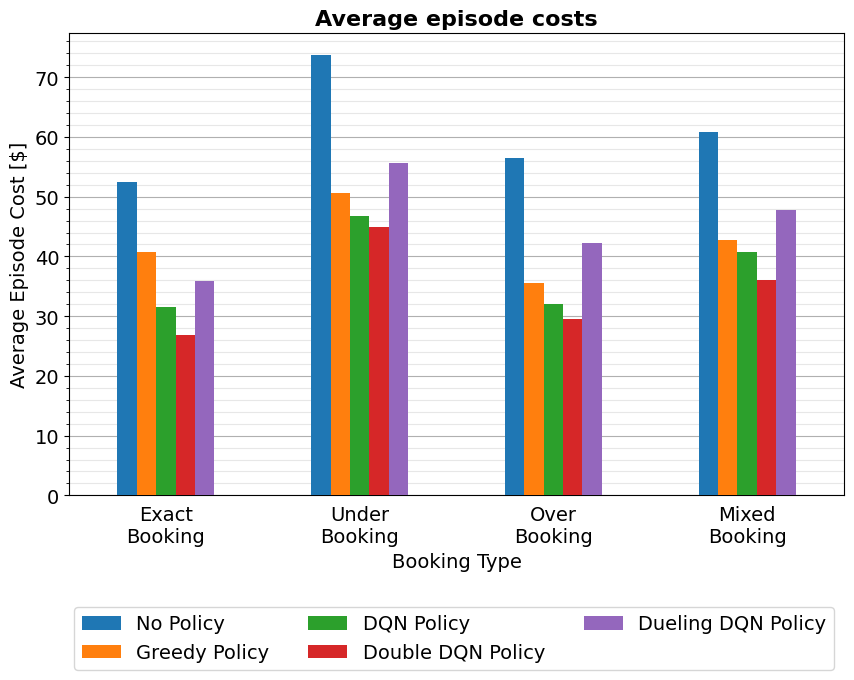

In [10]:
def draw_cumulative_reward_plots():
    
    data_list = []
    for booking in bookings:

        # load the data
        no_policy_df = pd.read_csv(f'{booking}/no_policy.csv')
        greedy_policy_df = pd.read_csv(f'{booking}/greedy_policy.csv')
        dqn_policy_df = pd.read_csv(f'{booking}/dqn_policy.csv')
        double_dqn_policy_df = pd.read_csv(f'{booking}/double_dqn_policy.csv')
        dueling_dqn_policy_df = pd.read_csv(f'{booking}/dueling_dqn_policy.csv')
        
        data_list.append([booking.capitalize().replace('booking', '\nBooking'), 
                         -no_policy_df.groupby("episode").sum().reward.mean(), 
                         -greedy_policy_df.groupby("episode").sum().reward.mean(), 
                         -dqn_policy_df.groupby("episode").sum().reward.mean(), 
                         -double_dqn_policy_df.groupby("episode").sum().reward.mean(), 
                         -dueling_dqn_policy_df.groupby("episode").sum().reward.mean()])
    
    # create data
    df = pd.DataFrame(data_list,
                      columns=['Booking Type', 'No Policy', 'Greedy Policy', 
                               'DQN Policy', 'Double DQN Policy', 'Dueling DQN Policy'])

    # plot grouped bar chart
    df.plot(x='Booking Type',
            kind='bar',
            stacked=False, 
            figsize=(10, 6), 
            zorder=3)
    plt.title('Average episode costs', fontweight="bold", fontsize=16)
    plt.grid(True, axis='y', zorder=0)
    plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
    plt.xticks(rotation=0, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Average Episode Cost [$]', fontsize=14)
    plt.xlabel('Booking Type', fontsize=14)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=False)
    plt.legend(fontsize=14, ncol=3, bbox_to_anchor=(1.0, -0.22))
draw_cumulative_reward_plots()

In [11]:
no_policy_df = pd.read_csv(f'exactbooking/no_policy.csv')
greedy_policy_df = pd.read_csv(f'exactbooking/greedy_policy.csv')
dqn_policy_df = pd.read_csv(f'exactbooking/dqn_policy.csv')
double_dqn_policy_df = pd.read_csv(f'exactbooking/double_dqn_policy.csv')
dueling_dqn_policy_df = pd.read_csv(f'exactbooking/dueling_dqn_policy.csv')

def get_mean_update_number(df):
    return df.query('action == 1 | action == 2').groupby('episode').count()['action'].mean()

no_policy_update_number = get_mean_update_number(no_policy_df)/10
greedy_policy_update_number = get_mean_update_number(greedy_policy_df)/10
dqn_policy_update_number = get_mean_update_number(dqn_policy_df)/10
double_dqn_policy_update_number = get_mean_update_number(double_dqn_policy_df)/10
dueling_dqn_policy_update_number = get_mean_update_number(dueling_dqn_policy_df)/10

Text(0, 0.5, 'Average Update Number / BS')

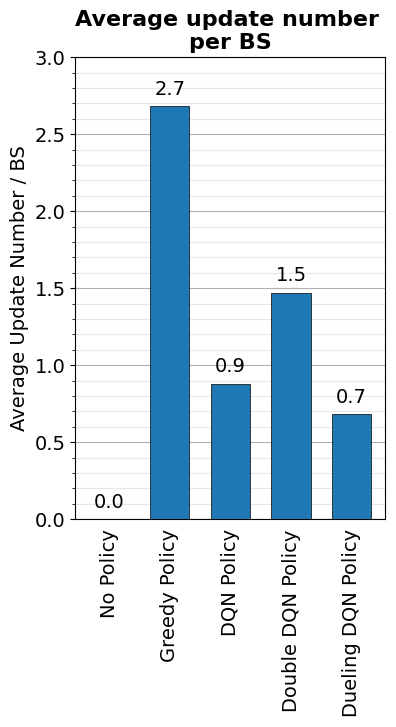

In [12]:
plt.figure(figsize=(4, 6))


bar1 = plt.bar(['No Policy', 'Greedy Policy', 'DQN Policy', 'Double DQN Policy', 'Dueling DQN Policy'],
        [0, 
         greedy_policy_update_number, 
         dqn_policy_update_number, 
         double_dqn_policy_update_number, 
         dueling_dqn_policy_update_number], 
         width=0.65, 
         zorder=3, 
         #color='#e6bcbc',
                            edgecolor='black', 
              linewidth=0.5, )

# Add counts above the two bar graphs
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height+0.05, f'{height:.1f}', ha='center', va='bottom', fontsize=14)

plt.grid(True, axis='y', zorder=0)
plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0, 3])
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=False)
plt.title('Average update number \nper BS', fontweight="bold", fontsize=16)
plt.ylabel('Average Update Number / BS', fontsize=14)

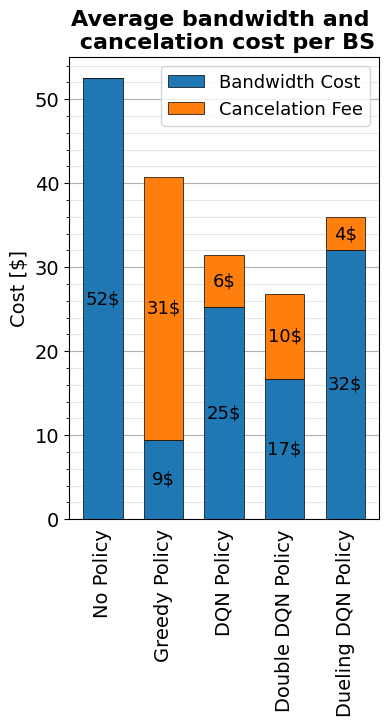

In [18]:
no_policy_df = pd.read_csv(f'exactbooking/no_policy.csv')
greedy_policy_df = pd.read_csv(f'exactbooking/greedy_policy.csv')
dqn_policy_df = pd.read_csv(f'exactbooking/dqn_policy.csv')
double_dqn_policy_df = pd.read_csv(f'exactbooking/double_dqn_policy.csv')
dueling_dqn_policy_df = pd.read_csv(f'exactbooking/dueling_dqn_policy.csv')

prices = [no_policy_df.current_price.sum() / 10,
         greedy_policy_df.current_price.sum() / 10,
         dqn_policy_df.current_price.sum() / 10,
         double_dqn_policy_df.current_price.sum() / 10,
         dueling_dqn_policy_df.current_price.sum() / 10]
cancelation_costs = [(-no_policy_df.reward.sum() / 10 - prices[0]),
                    (-greedy_policy_df.reward.sum() / 10 - prices[1]),
                    (-dqn_policy_df.reward.sum() / 10  - prices[2]),
                    (-double_dqn_policy_df.reward.sum() / 10 - prices[3]),
                    (-dueling_dqn_policy_df.reward.sum() /10 - prices[4])]

plt.figure(figsize=(4, 6))
bar1 = plt.bar(['No Policy', 'Greedy Policy', 'DQN Policy', 'Double DQN Policy', 'Dueling DQN Policy'], 
        prices, 
        width=0.65,
        label='Bandwidth Cost', 
              zorder=3, 
              edgecolor='black', 
              linewidth=0.5, 
              )
bar2 = plt.bar(['No Policy', 'Greedy Policy', 'DQN Policy', 'Double DQN Policy', 'Dueling DQN Policy'], 
        height=cancelation_costs,
        width=0.65,
        bottom=prices, 
       label='Cancelation Fee', 
              zorder=3, 
              edgecolor='black', 
              linewidth=0.5, 
              )

# Add counts above the two bar graphs
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2, f'{height:.0f}$', ha='center', va='center', fontsize=13)

for rect1, rect2 in zip(bar1[1:], bar2[1:]):
    label = rect2.get_height()
    height = rect2.get_height()/2 + rect1.get_height()
    plt.text(rect2.get_x() + rect.get_width() / 2.0, height, f'{label:.0f}$', ha='center', va='center', fontsize=13)
    
plt.grid(True, axis='y', zorder=0)
plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.minorticks_on()
plt.ylim([0, 55])
plt.tick_params(axis='x', which='both', bottom=False)
plt.title('Average bandwidth and \n cancelation cost per BS', fontweight="bold", fontsize=16)
plt.ylabel('Cost [$]', fontsize=14)
plt.legend(fontsize=13)

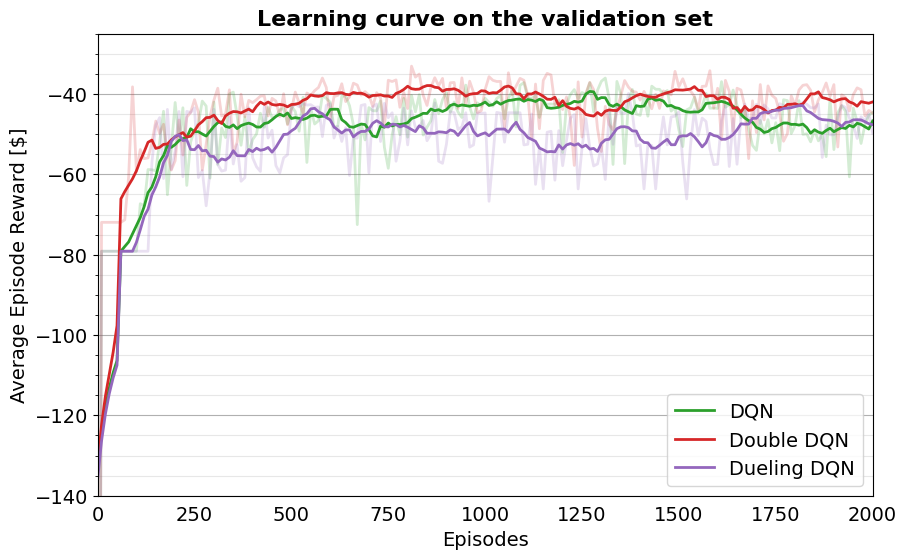

In [14]:
dqn_training = pd.read_csv('exactbooking/dqn_training.csv')
double_dqn_training = pd.read_csv('exactbooking/double_dqn_training.csv')
dueling_dqn_training = pd.read_csv('exactbooking/dueling_dqn_training.csv')

rolling_window = 10
dqn_training['Value_ma'] = dqn_training.Value.rolling(rolling_window, center=True, min_periods=1).mean()
double_dqn_training['Value_ma'] = double_dqn_training.Value.rolling(rolling_window, center=True, min_periods=1).mean()
dueling_dqn_training['Value_ma'] = dueling_dqn_training.Value.rolling(rolling_window, center=True, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(dqn_training.index*10, dqn_training['Value'], alpha=0.2, color='#2ca02c', linewidth=2)
plt.plot(dqn_training.index*10, double_dqn_training['Value'], alpha=0.2, color='#d62728', linewidth=2)
plt.plot(dqn_training.index*10, dueling_dqn_training['Value'], alpha=0.2, color='#9467bd', linewidth=2)

plt.plot(dqn_training.index*10, dqn_training['Value_ma'], label='DQN', color='#2ca02c', linewidth=2)
plt.plot(dqn_training.index*10, double_dqn_training['Value_ma'], label='Double DQN', color='#d62728', linewidth=2)
plt.plot(dqn_training.index*10, dueling_dqn_training['Value_ma'], label='Dueling DQN', color='#9467bd', linewidth=2)

plt.title('Learning curve on the validation set', fontweight="bold", fontsize=16)
plt.grid(True, axis='y', zorder=0)
plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Average Episode Reward [$]', fontsize=14)
plt.xlabel('Episodes', fontsize=14)
plt.xlim([0, 2000])
plt.ylim([-140, -25])
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=False)
plt.legend(fontsize=14, loc='lower right')

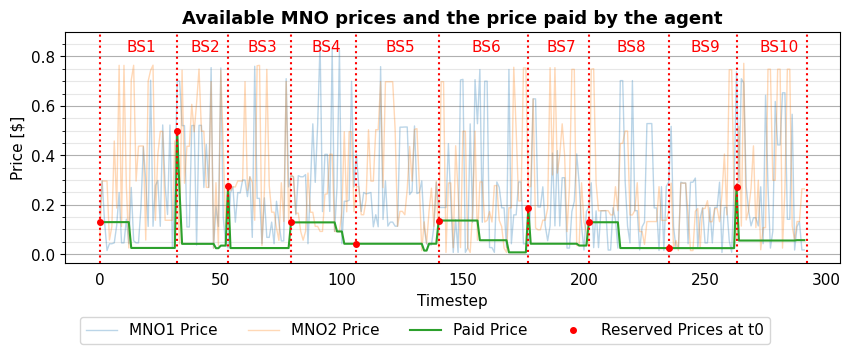

In [15]:
double_dqn_policy_df = pd.read_csv(f'exactbooking/double_dqn_policy.csv')
double_dqn_policy_df = double_dqn_policy_df.query('episode == 0')
bs_end_indices = [0] + (double_dqn_policy_df.query('timesteps_left == 0.025').index+1).tolist()
prereserved_prices = double_dqn_policy_df.iloc[bs_end_indices[:-1]]

plt.figure(figsize=[10,3])
plt.plot(double_dqn_policy_df['no1_price'], label='MNO1 Price', alpha=0.3, linewidth=1)
plt.plot(double_dqn_policy_df['no2_price'], label='MNO2 Price', alpha=0.3, linewidth=1)
plt.plot(double_dqn_policy_df['current_price'], label='Paid Price')
plt.plot(prereserved_prices['current_price'], 'ro', label='Reserved Prices at t0', markersize=4)

plt.axvline(x = 0, color = 'r', linestyle='dotted', linewidth=1.5)
for i in range(1, len(bs_end_indices)):
    plt.text(x=(bs_end_indices[i-1] + bs_end_indices[i])/2-5, 
            y=0.82, 
            s=f'BS{i}', 
            color='r', 
            fontsize=11)
    plt.axvline(x = bs_end_indices[i], color = 'r', linestyle='dotted', linewidth=1.5)
    
plt.title('Available MNO prices and the price paid by the agent', fontweight="bold", fontsize=13)
plt.grid(True, axis='y', zorder=0)
plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Price [$]', fontsize=11)
plt.xlabel('Timestep', fontsize=11)
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=False)
plt.legend(fontsize=11, ncol=4, bbox_to_anchor=(0.92, -0.2))

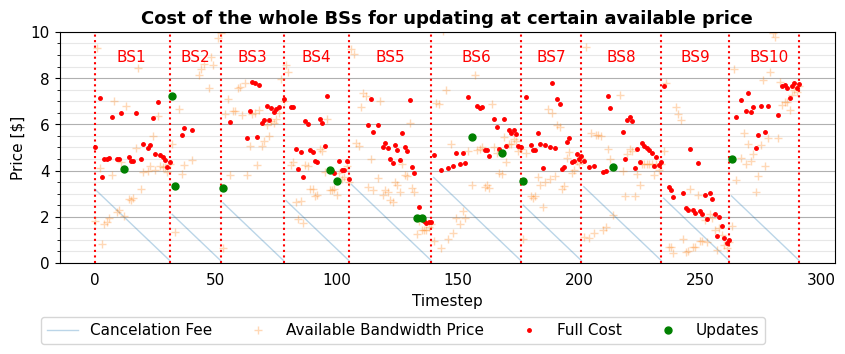

In [16]:
def legend_without_duplicate_labels(ax, **kwargs):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), **kwargs)

CANCELATION_FEE = 0.1

double_dqn_policy_df = pd.read_csv(f'exactbooking/double_dqn_policy.csv')
double_dqn_policy_df = double_dqn_policy_df.query('episode == 0')
bs_end_indices = [0] + (double_dqn_policy_df.query('timesteps_left == 0.025').index+1).tolist()

bs_parts = []
for index in range(0, len(bs_end_indices)-1):
    bs1 = double_dqn_policy_df.iloc[bs_end_indices[index]:bs_end_indices[index+1]].reset_index()

    bs1['timestep_left'] = list(range(len(bs1), 0, -1))
    bs1['timestep_done'] = list(range(0, len(bs1), 1))

    bs1['cancelation_fee'] = bs1['timestep_left'] * CANCELATION_FEE

    bs1['price_of_update'] = bs1[['no1_price', 'no2_price']].min(1)
    bs1['price_of_update'] = bs1['timestep_left'] * bs1['price_of_update']
    bs1['price_of_update'] += bs1['current_price'][0] * bs1['timestep_done']
    bs1['full_price'] = bs1['price_of_update'] + bs1['cancelation_fee']
    
    bs1['full_price'][bs1['full_price'] > 8] = np.nan
    
    update_mask = bs1.current_price.diff(-1).abs() > 0.02
#     indices = update_mask[update_mask].index[1:]
#     update_mask.iloc[indices] = False
    bs1['change_price'] = bs1['full_price'][update_mask]
    
    bs_parts.append(bs1.set_index('index'))

bs = pd.concat(bs_parts, 1)

_, ax = plt.subplots(figsize=[10,3])

plt.axvline(x = 0, color = 'r', linestyle='dotted', linewidth=1.5)
for i in range(1, len(bs_end_indices)):
    plt.text(x=(bs_end_indices[i-1] + bs_end_indices[i])/2-7, 
            y=8.7, 
            s=f'BS{i}', 
            color='r', 
            fontsize=11)
    plt.axvline(x = bs_end_indices[i]-1, color = 'r', linestyle='dotted', linewidth=1.5)

plt.plot(bs['cancelation_fee'], color='#1f77b4', label="Cancelation Fee", alpha=0.3, linewidth=1)
plt.plot(bs['price_of_update'], '+', color='#ff7f0e', label='Available Bandwidth Price', alpha=0.3)
plt.plot(bs['full_price'],'ro', markersize=2.5, label='Full Cost')
plt.plot(bs['change_price'],'go', markersize=5, label='Updates')
    
plt.title('Cost of the whole BSs for updating at certain available price', fontweight="bold", fontsize=13)
plt.grid(True, axis='y', zorder=0)
plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Price [$]', fontsize=11)
plt.xlabel('Timestep', fontsize=11)
plt.ylim([0, 10])
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=False)
legend_without_duplicate_labels(ax, fontsize=11, ncol=4, bbox_to_anchor=(0.92, -0.2))

greedy
dqn
double_dqn
dueling_dqn


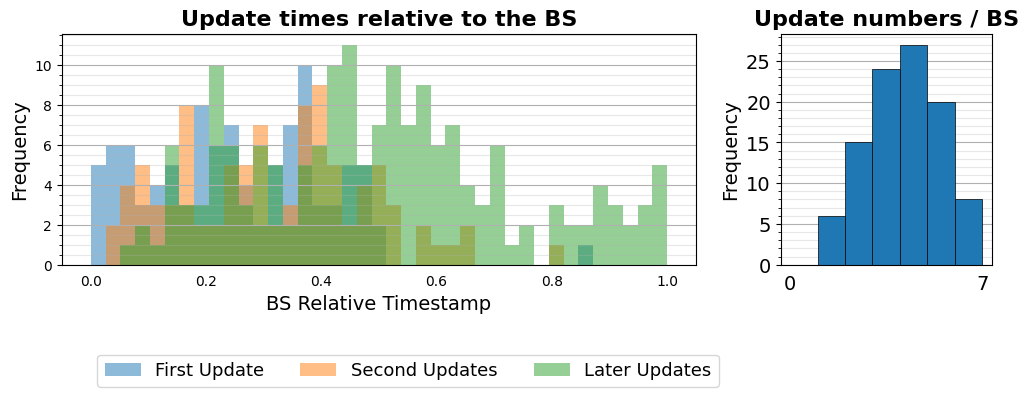

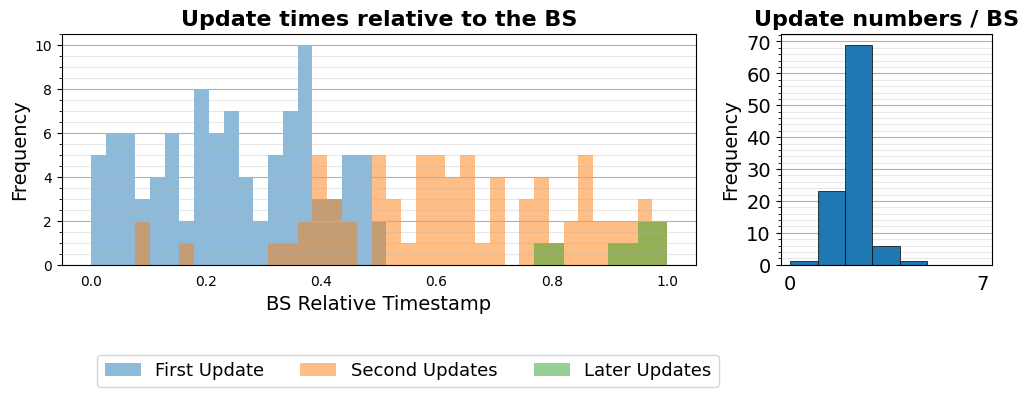

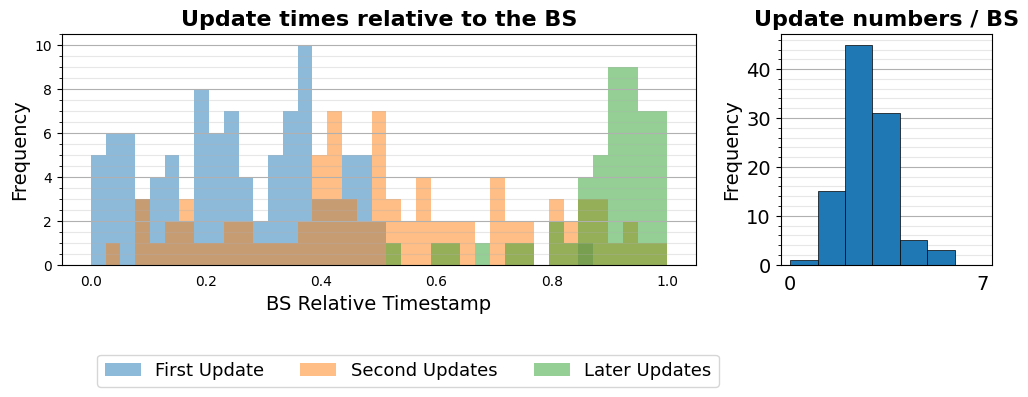

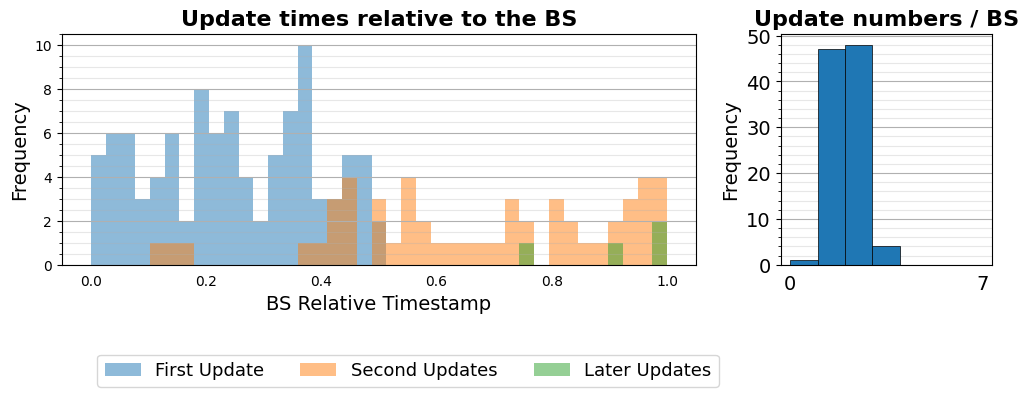

In [21]:
methods = ['greedy', 'dqn', 'double_dqn', 'dueling_dqn']

def update_time_an_num(method):
    double_dqn_policy_df = pd.read_csv(f'exactbooking/{method}_policy.csv')
    bs_end_indices = [0] + (double_dqn_policy_df.query('timesteps_left == 0.025').index+1).tolist()
    double_dqn_policy_df['updates'] = double_dqn_policy_df['current_price'].diff(1) != 0

    first_updates = []
    second_updates = []
    last_updates = []
    update_number = []
    bs_reward = []

    for index in range(0, len(bs_end_indices)-1):
        bs1 = double_dqn_policy_df.iloc[bs_end_indices[index]:bs_end_indices[index+1]].reset_index()

        updates = 1-bs1[bs1.updates]
        if len(updates) > 0:
            first_updates.append(updates.iloc[0]['timesteps_left'])

            if len(updates) > 1:
                second_updates.append(updates.iloc[1]['timesteps_left'])
                
                if len(updates) > 2:
                    last_updates.extend(updates.iloc[2:]['timesteps_left'])

        update_number.append(len(updates))
        bs_reward.append(-bs1.reward.sum())

    fig, (a1, a2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(12, 3))

    a1.hist(first_updates, bins=np.linspace(0, 1, 40), alpha=0.5, label='First Update')
    a1.hist(second_updates, bins=np.linspace(0, 1, 40), alpha=0.5, label='Second Updates')
    a1.hist(last_updates, bins=np.linspace(0, 1, 40), alpha=0.5, label='Later Updates')
    a1.legend()

    a1.grid(True, axis='y', zorder=0)
    a1.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    a1.minorticks_on()
    a1.tick_params(axis='x', which='both', bottom=False)
    a1.set_title('Update times relative to the BS', fontweight="bold", fontsize=16)
    a1.set_ylabel('Frequency', fontsize=14)
    a1.set_xlabel('BS Relative Timestamp', fontsize=14)
    a1.legend(fontsize=13, ncol=3, bbox_to_anchor=(1.05, -0.35))

    plt.hist(update_number, bins=[0, 1, 2, 3, 4, 5, 6, 7], zorder=2, edgecolor='black', linewidth=0.5,)

    plt.grid(True, axis='y', zorder=0)
    plt.grid(True, which='minor', axis='y', alpha=0.3, zorder=0)
    plt.xticks([0, 7], fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=False)
    plt.title('Update numbers / BS', fontweight="bold", fontsize=16)
    plt.ylabel('Frequency', fontsize=14)
#     plt.xlabel('Update number per BS', fontsize=14)
    
for method in methods:
    print(method)
    update_time_an_num(method)

<AxesSubplot: xlabel='update_number'>

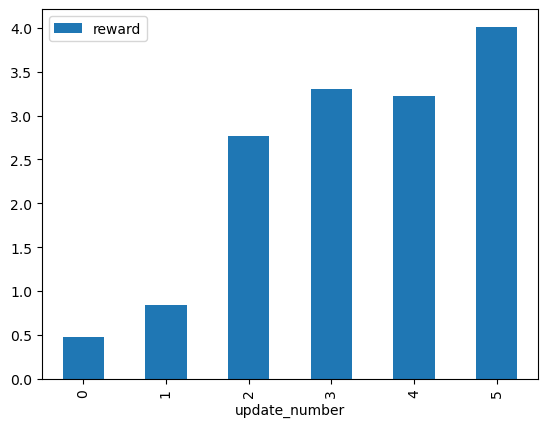

In [86]:
updatenum_reward_df = pd.DataFrame({'update_number': update_number, 'reward': bs_reward})
updatenum_avg_reward = updatenum_reward_df.groupby('update_number').reward.mean().to_frame()
updatenum_avg_reward.plot.bar()